<a href="https://colab.research.google.com/github/sejal2229/CE888/blob/main/Project-2/Copy_of_TweetEval_based_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Using Bert(RoBERTa-Base)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data_train_1 = pd.read_csv('../input/sentiment/sentiment/train_text.txt', error_bad_lines=False, names=['Sentiment'])
data_train_2 = pd.read_csv('../input/sentiment/sentiment/train_labels.txt', error_bad_lines=False, names=['Label']) 
Data_train = data_train_1.copy()
Data_train['Label'] = data_train_2['Label']

data_train_3 = pd.read_csv('../input/sentiment/sentiment/val_text.txt', error_bad_lines=False, names=['Sentiment'])
data_train_4 = pd.read_csv('../input/sentiment/sentiment/val_labels.txt', error_bad_lines=False, names=['Label']) 
Data_val = data_train_3.copy()
Data_val['Label'] = data_train_4['Label']

data_train_5 = pd.read_csv('../input/sentiment/sentiment/test_text.txt', error_bad_lines=False, names=['Sentiment'])
data_train_6 = pd.read_csv('../input/sentiment/sentiment/test_labels.txt', error_bad_lines=False, names=['Label']) 
Data_test = data_train_5.copy()
Data_test['Label'] = data_train_6['Label']

In [ ]:
print(Data_train.info())
print(Data_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  36301 non-null  object
 1   Label      36301 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 567.3+ KB
None
                                           Sentiment  Label
0  QT @user In the original draft of the 7th book...      2
1  Ben Smith / Smith (concussion) remains out of ...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2


In [ ]:
print(Data_val.info())
print(Data_val.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1616 non-null   object
 1   Label      1616 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.4+ KB
None
                                           Sentiment  Label
0  Dark Souls 3 April Launch Date Confirmed With ...      1
1  National hot dog day, national tequila day, th...      2
2  When girls become bandwagon fans of the Packer...      0
3  @user I may or may not have searched it up on ...      1
4  Here's your starting TUESDAY MORNING Line up a...      1


In [ ]:
print(Data_test.info())
print(Data_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11762 entries, 0 to 11761
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  11762 non-null  object
 1   Label      11762 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.9+ KB
None
                                           Sentiment  Label
0  @user @user what do these '1/2 naked pics' hav...      1
1  OH: “I had a blue penis while I was this” [pla...      1
2                          @user @user That's coming      1
3  I think I may be finally in with the in crowd ...      2
4                                          @user Wow      0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Test Data'}, xlabel='Label', ylabel='count'>

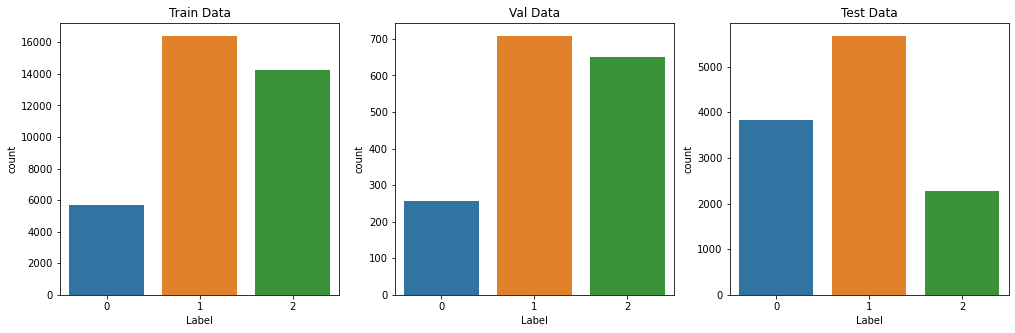

In [ ]:
# 0 -> Negative
# 1 -> Neutral
# 2 -> Positive

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.title('Train Data')
sns.countplot(Data_train.Label)
plt.subplot(1,3,2)
plt.title('Val Data')
sns.countplot(Data_val.Label)
plt.subplot(1,3,3)
plt.title('Test Data')
sns.countplot(Data_test.Label)

## Model

In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 206 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 74 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 4.6 MB 32.3 MB/s eta 0:00:01     |███████████████████████████▊    | 4.0 MB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 49.7 MB/s eta 0:00:01


  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16170 sha256=43d98927c8efc94f5b3394069adb8450588091893ebdba662587d917f442262b
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.1.1
    Uninstalling ipykernel-5.1.1:
      Successfully uninstalled ipykernel-5.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

model_args = ClassificationArgs()
model_args.num_train_epochs = 5
model_args.learning_rate = 1e-4
model_args.evaluate_during_training = True
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.train_batch_size = 64
model_args.eval_batch_size = 64

model = ClassificationModel("roberta", "roberta-base", num_labels=3, use_cuda=True, args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
model.train_model(Data_train,output_dir= './model.h5', eval_df = Data_val, acc=sklearn.metrics.accuracy_score)

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/568 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 5:   0%|          | 0/568 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 2 of 5:   0%|          | 0/568 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 3 of 5:   0%|          | 0/568 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 

Running Epoch 4 of 5:   0%|          | 0/568 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


(2840,
 {'global_step': [568, 1136, 1704, 2000, 2272, 2840],
  'mcc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'train_loss': [1.1698044538497925,
   1.037354588508606,
   0.879212498664856,
   1.0236932039260864,
   1.1107518672943115,
   0.9851628541946411],
  'eval_loss': [1.0232157913538127,
   1.0245633331628947,
   1.023022718154467,
   1.0230913322705488,
   1.0231404648377345,
   1.0231628188720117],
  'acc': [0.4381188118811881,
   0.4381188118811881,
   0.4381188118811881,
   0.4381188118811881,
   0.4381188118811881,
   0.4381188118811881]})

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(Data_test, acc=sklearn.metrics.accuracy_score)

/opt/conda/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/184 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
print('Test Accuracy:',result)

Test Accuracy: {'mcc': 0.0, 'acc': 0.4821458935555178, 'eval_loss': 1.1673118724771168}


## Test Accuracy Achieved: 48.21%

In [ ]:
predictions, raw_outputs = model.predict(["I am very proud of you"])

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
if predictions == 0:
    print('Negative')
elif predictions == 1:
    print('Neutral')
elif predictions == 2:
    print('Positve')

Neutral
